# Example of ORM Access to Data via Frames

As the bergen django-API provides simple access to the Postgres Database, we are able to wrapp the metadata in an easy to use django driven ORM base.

In [27]:
import matplotlib.pyplot as plt
import zarr as zr
import xarray as xr
import django
import toolz

django.setup()
from elements.models import Transformation, Representation, Sample, ROI
from transformers.models import Transforming

In [30]:
representation = Representation.objects.get(pk=228)

2020-03-09 15:32:58,508 [larvik.extenders] INFO     Stack has 1 Timepoints: selecting t=0


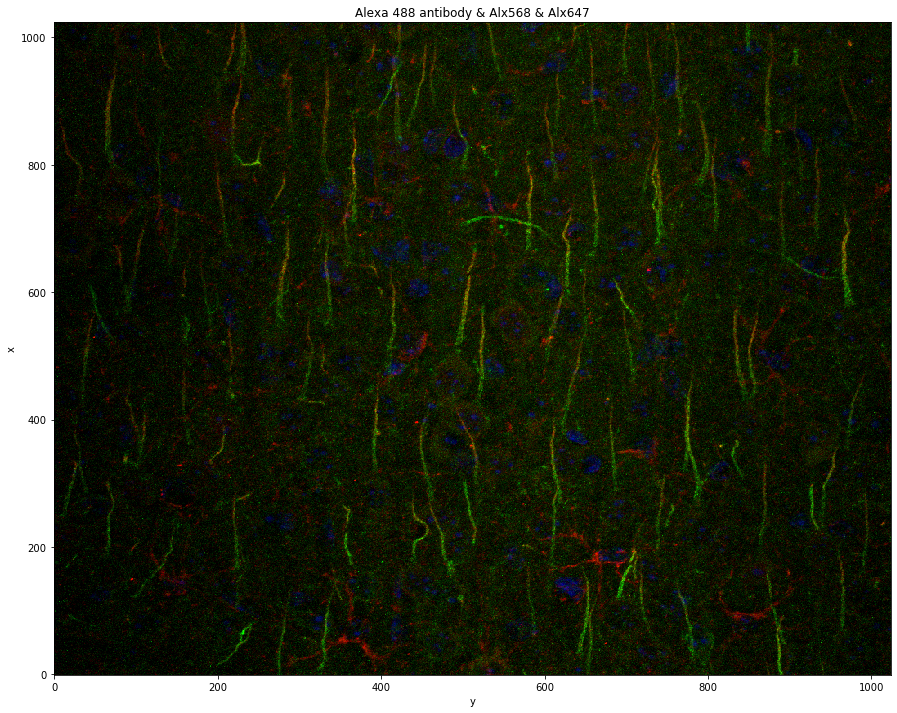

In [31]:
representation.viewer.show()

In [32]:
representation.biometa.scan

,DimensionOrder,PhysicalSizeX,PhysicalSizeXUnit,PhysicalSizeY,PhysicalSizeYUnit,PhysicalSizeZ,PhysicalSizeZUnit,SignificantBits,SizeC,SizeT,SizeX,SizeY,SizeZ,TimeIncrement,Type
0,XYCZT,0.20716,µm,0.20716,µm,0.5,µm,12,3,1,1024,1024,31,None,uint16


In [33]:
representation.biometa.channels.compute()

,Index,Name,EmissionWavelength,ExcitationWavelength,IlluminationType,AcquisitionMode,Color,SamplesPerPixel
0,0,Alexa 488 antibody,535.0,NaN,None,None,16711935,1
1,1,Alx568,590.0,NaN,None,None,-16776961,1
2,2,Alx647,825.0,NaN,None,None,65535,1


## Query related objects

Representations have rois and transformations attached. Simply query theme

In [34]:
representation.sample

,id,creator,name,experiment,nodeid,experimentalgroup,animal
0,36,1,nd.nd2 (series 1),None,sefosineofinsoienoisnef,None,None


In [37]:
representation.transformations.count()

46

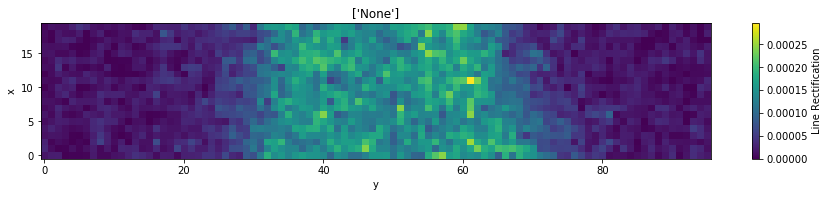

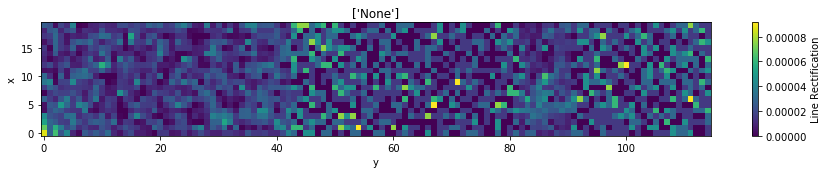

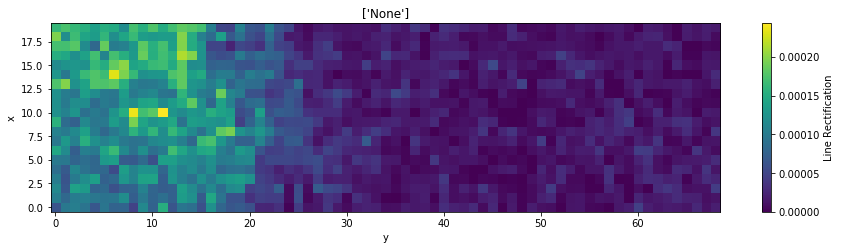

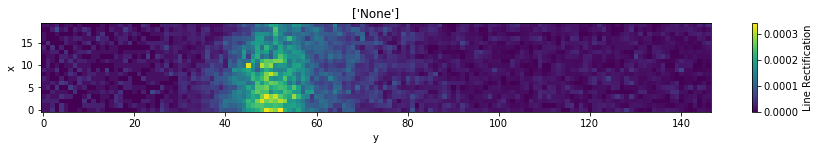

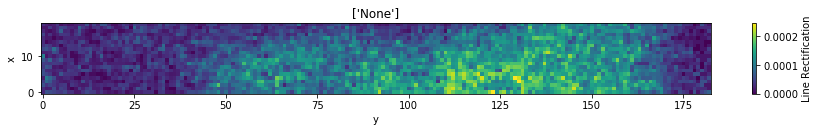

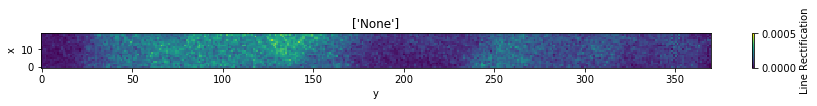

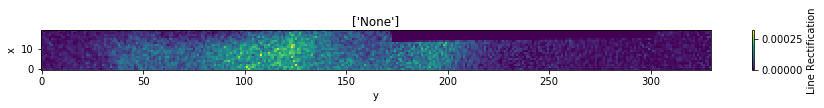

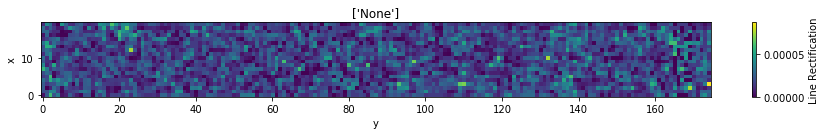

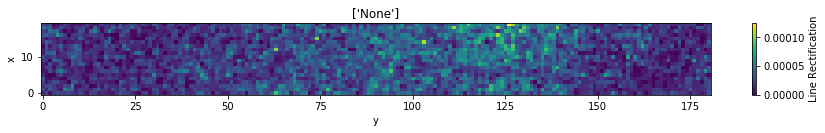

In [17]:
for trans in representation.transformations.all():
    trans.viewer.show()